In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.cluster as cluster
from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
start_time = time.time()
end_time = time.time()
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [ ]:
data = pd.read_csv(r'/content/steam_reviews.csv')

# Data Exploration

In [ ]:
data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [ ]:
data.describe()

,funny,helpful,hour_played
count,41036.000000,41036.000000,41036.000000
mean,0.413369,1.041549,224.059972
std,15.835102,31.373471,339.063690
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,37.000000
50%,0.000000,0.000000,122.000000
75%,0.000000,0.000000,272.000000
max,2458.000000,4632.000000,11579.000000


from matplotlib import pyplot as plt
_df_0['funny'].plot(kind='hist', bins=20, title='funny')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['helpful'].plot(kind='hist', bins=20, title='helpful')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hour_played'].plot(kind='hist', bins=20, title='hour_played')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='funny', y='helpful', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='helpful', y='hour_played', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['funny'].plot(kind='line', figsize=(8, 4), title='funny')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['helpful'].plot(kind='line', figsize=(8, 4), title='helpful')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['hour_played'].plot(kind='line', figsize=(8, 4), title='hour_played')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41036 entries, 0 to 41035
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date_posted             41036 non-null  object
 1   funny                   41036 non-null  int64 
 2   helpful                 41036 non-null  int64 
 3   hour_played             41036 non-null  int64 
 4   is_early_access_review  41036 non-null  bool  
 5   recommendation          41036 non-null  object
 6   review                  40970 non-null  object
 7   title                   41035 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 2.2+ MB


In [ ]:
data.nunique()

date_posted                1017
funny                        69
helpful                     131
hour_played                1803
is_early_access_review        2
recommendation                2
review                    38185
title                        10
dtype: int64

In [ ]:
data.index

RangeIndex(start=0, stop=41036, step=1)

In [ ]:
data.duplicated().any()

False

There are no duplicates in this data

In [ ]:
data.nunique()

date_posted                1017
funny                        69
helpful                     131
hour_played                1803
is_early_access_review        2
recommendation                2
review                    38185
title                        10
dtype: int64

In [ ]:
data_imputed = data.drop(['date_posted', 'is_early_access_review', 'recommendation', 'review', 'title'], axis=1)
data_imputed.head()

,funny,helpful,hour_played
0,2,4,578
1,0,0,184
2,0,0,892
3,126,1086,676
4,85,2139,612


In [ ]:
data_imputed.shape

(41036, 3)

In [ ]:
len(data.index)

41036

In [ ]:
data_imputed.isnull().sum()

funny          0
helpful        0
hour_played    0
dtype: int64

No Null Values

# Data visualization

# K-means Clustering:

In [ ]:
random_sample = data_imputed.sample(n=10000, random_state=42).reset_index(drop=True)
data_imputed = random_sample

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns).reset_index(drop=True)
df_scaled.shape

(10000, 3)

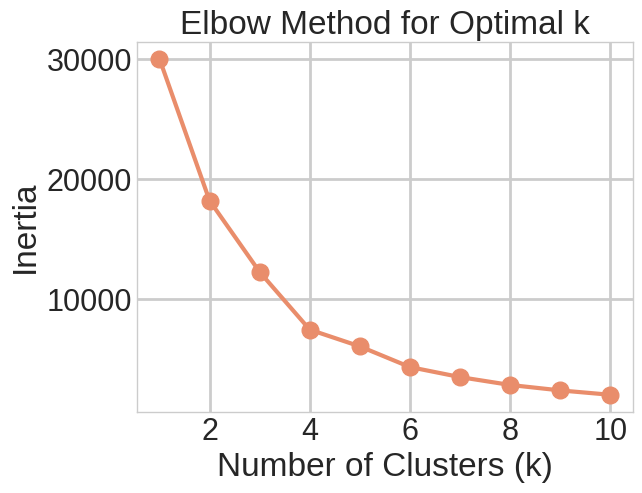

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Computation Time: 0.5022 seconds
Silhouette Score: 0.6526
Davies-Bouldin Score: 0.4700
Cluster Sizes:
0    7910
2    1794
5     288
1       4
4       3
3       1
Name: Cluster, dtype: int64
Cluster Composition:
            funny                                                              \
             0         1         2         3         4         5         6      
Cluster                                                                         
0        0.928571  0.040834  0.011504  0.006574  0.003666  0.002023  0.002149   
1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2        0.941472  0.031215  0.012821  0.005017  0.003902  0.001115  0.000557   
3        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5        0.913194  0.055556  0.010417  0.006944  0.006944  0.000000  0.003472   

                                       ... hour_played     

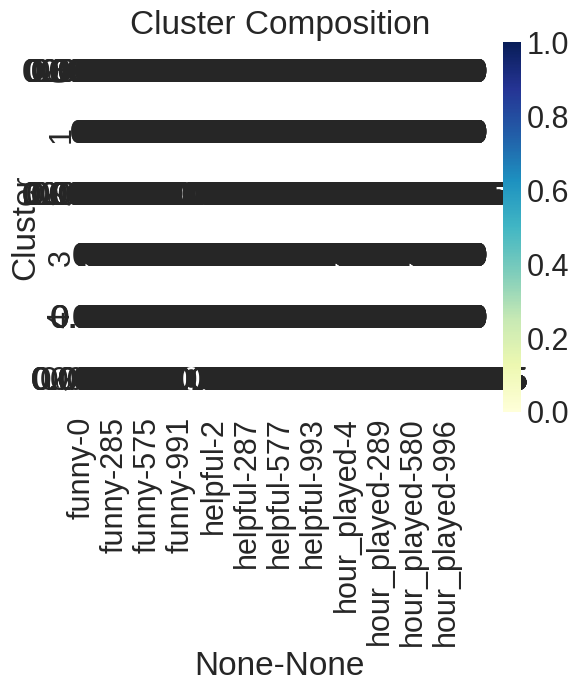

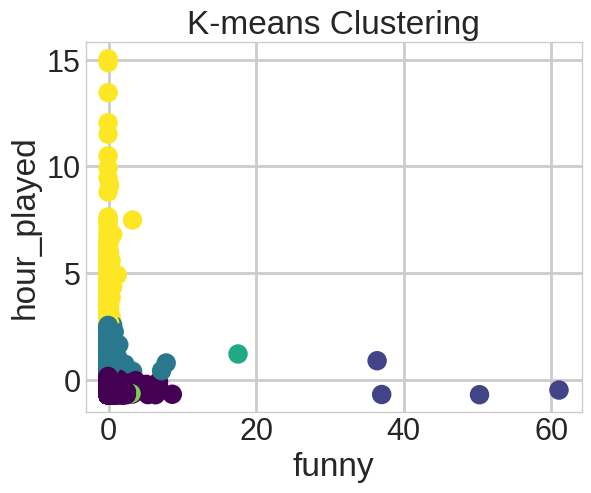

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

k = 6
start_time = time.time()

kmeans = KMeans(n_clusters=k, random_state=42)
data_imputed['Cluster'] = kmeans.fit_predict(df_scaled)

end_time = time.time()

computation_time = end_time - start_time
print(f"Computation Time: {computation_time:.4f} seconds")

# Silhouette Score
silhouette_avg = silhouette_score(df_scaled, data_imputed['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(df_scaled, data_imputed['Cluster'])
print(f"Davies-Bouldin Score: {davies_bouldin_avg:.4f}")

cluster_counts = data_imputed['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)

selected_columns = ['funny', 'helpful', 'hour_played']
cluster_composition = data_imputed.groupby('Cluster')[selected_columns].apply(lambda x: x.apply(pd.Series.value_counts, normalize=True)).unstack().fillna(0)

print("Cluster Composition:")
print(cluster_composition)

sns.heatmap(cluster_composition, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Cluster Composition')
plt.show()

plt.scatter(df_scaled['funny'], df_scaled['hour_played'], c=data_imputed['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('funny')
plt.ylabel('hour_played')
plt.show()


# Principal Component Analysis with Kmeans

Explained Variance Ratio: [0.46778638 0.35336942]


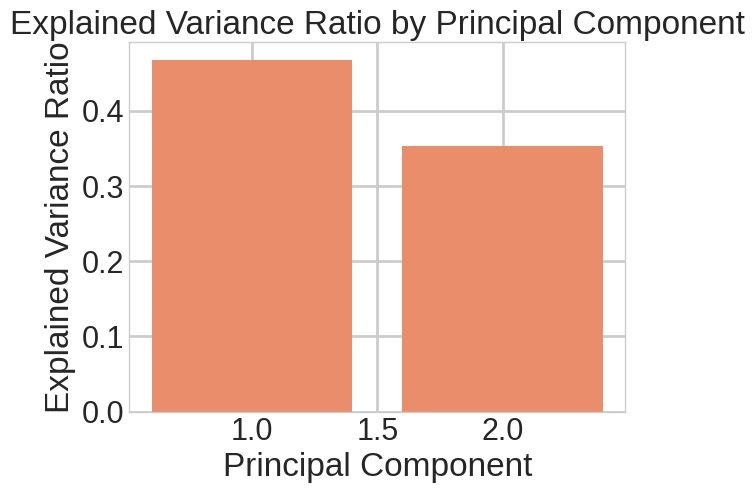

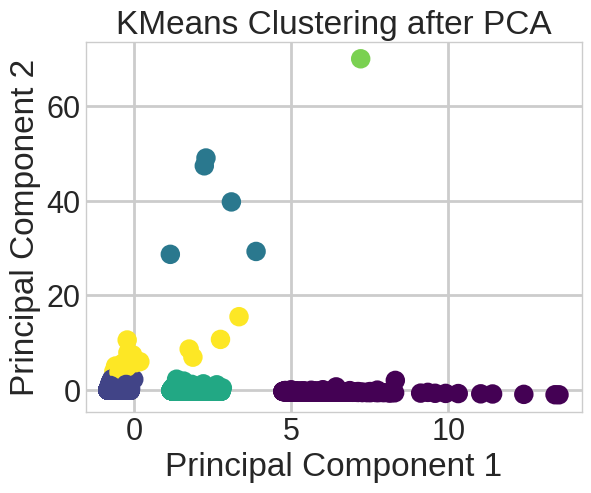

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed)

n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
data_imputed['Cluster_PCA'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data_imputed['Cluster_PCA'], cmap='viridis')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Spectral Clustering:

Spectral Clustering Computation Time: 22.9254 seconds
Silhouette Score (Spectral Clustering): 0.9753
Davies-Bouldin Score (Spectral Clustering): 0.0176
Cluster Sizes:
0    9999
1       1
Name: Cluster_Spectral, dtype: int64
Cluster Composition:
                     funny                                                \
                      0         1         2         3       4       5      
Cluster_Spectral                                                           
0                 0.929793  0.039504  0.011701  0.006301  0.0038  0.0018   
1                 0.000000  0.000000  0.000000  0.000000  0.0000  0.0000   

                                                  ... hour_played          \
                    6       7       8       9     ...        3043    3143   
Cluster_Spectral                                  ...                       
0                 0.0019  0.0007  0.0008  0.0004  ...      0.0001  0.0001   
1                 0.0000  0.0000  0.0000  0.0000  ...      0.0000 

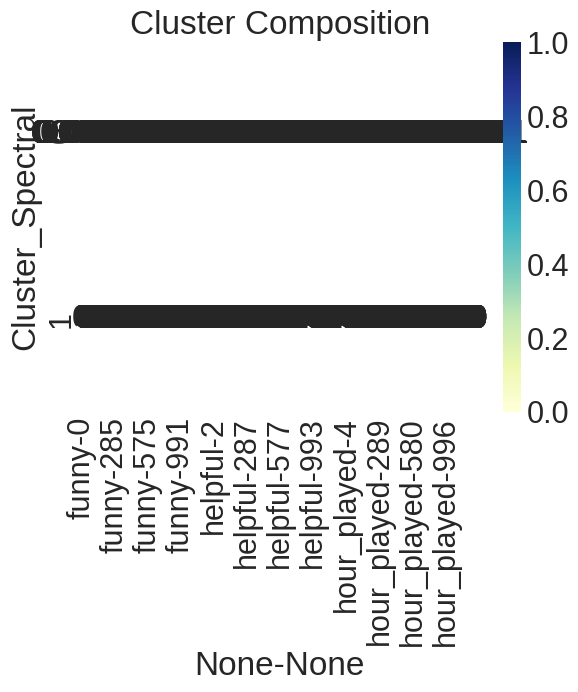

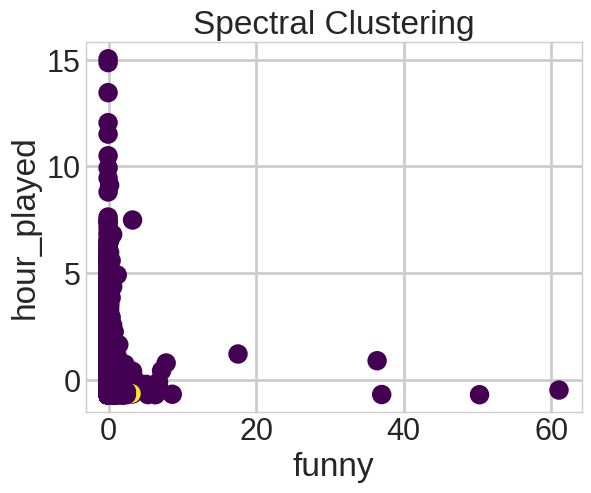

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

k = 6
start_time = time.time()

spectral = SpectralClustering(n_clusters=k, random_state=42)
data_imputed['Cluster_Spectral'] = spectral.fit_predict(df_scaled)

end_time = time.time()
computation_time = end_time - start_time
print(f"Spectral Clustering Computation Time: {computation_time:.4f} seconds")

# Silhouette Score
silhouette_avg_spectral = silhouette_score(df_scaled, data_imputed['Cluster_Spectral'])
print(f"Silhouette Score (Spectral Clustering): {silhouette_avg_spectral:.4f}")

# Davies-Bouldin Score
davies_bouldin_avg_spectral = davies_bouldin_score(df_scaled, data_imputed['Cluster_Spectral'])
print(f"Davies-Bouldin Score (Spectral Clustering): {davies_bouldin_avg_spectral:.4f}")

cluster_counts = data_imputed['Cluster_Spectral'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)

selected_columns = ['funny', 'helpful', 'hour_played']
cluster_composition = data_imputed.groupby('Cluster_Spectral')[selected_columns].apply(lambda x: x.apply(pd.Series.value_counts, normalize=True)).unstack().fillna(0)

print("Cluster Composition:")
print(cluster_composition)

sns.heatmap(cluster_composition, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Cluster Composition')
plt.show()

plt.scatter(df_scaled['funny'], df_scaled['hour_played'], c=data_imputed['Cluster_Spectral'], cmap='viridis')
plt.title('Spectral Clustering')
plt.xlabel('funny')
plt.ylabel('hour_played')
plt.show()


# Agglomerative Hierarchical Clustering:

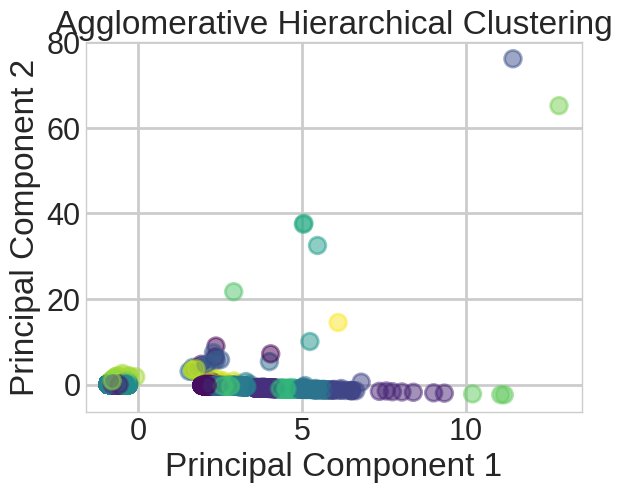

Silhouette Score: 0.5491808616249306
Davies-Bouldin Score: 0.49963294408459846
Computation Time: 2.891552448272705 seconds

Cluster Sizes:
13    2936
5     2160
14    1325
2     1056
1      851
9      501
28     302
20     225
12     203
4      158
24      98
19      55
11      49
25      17
6       16
27      12
3        7
10       6
8        5
0        4
22       3
26       3
15       1
29       1
17       1
23       1
16       1
21       1
18       1
7        1
Name: AggloCluster, dtype: int64

Cluster Composition:
                   funny      helpful  hour_played
AggloCluster                                      
0              31.750000   128.250000   149.000000
1               0.082256     0.133960   387.544066
2               0.157197     0.247159   176.176136
3               0.142857     0.142857  3488.714286
4               0.063291     0.082278  1197.088608
5               0.000000     0.000000   103.446296
6               1.250000     0.937500  2448.937500
7              15

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed)

start_time = time.time()

model = AgglomerativeClustering(n_clusters=None, distance_threshold=5, linkage='ward')
clusters = model.fit_predict(X_scaled)


computation_time = time.time() - start_time


data_imputed['AggloCluster'] = clusters


cluster_sizes = data_imputed['AggloCluster'].value_counts()


cluster_composition = data_imputed.groupby('AggloCluster').agg({
    'funny': 'mean',
    'helpful': 'mean',
    'hour_played': 'mean',
})


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


davies_bouldin_avg = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")


print(f"Computation Time: {computation_time} seconds")
print("\nCluster Sizes:")
print(cluster_sizes)
print("\nCluster Composition:")
print(cluster_composition)




##  Methodology

This section delineates the methodology employed for clustering analysis along with performance assessment.

**Data Preparation:**

1. **Data Acquisition:** The dataset was imported into a Pandas DataFrame.
2. **Feature Selection:** Relevant attributes such as discount prices, original prices, and ratings were chosen for clustering.
3. **Distributed Processing:** To facilitate analysis on extensive datasets, the DataFrame was transformed into a Dask DataFrame for distributed computing capabilities.
4. **Data Cleansing:**
    * Empty strings were substituted with NaN values.
    * Numerical columns underwent conversion into appropriate data types.
    * Missing values were imputed with the mean of their respective columns.
5. **Standardization:** Utilizing Dask-ML's `StandardScaler`, the data was standardized to ensure equitable feature weighting during clustering.

**Clustering Techniques:**

Three distinct clustering algorithms were employed on the standardized data:

1. **K-means Clustering:** This widely-used method partitions data points into a predefined number of clusters based on their similarity.
2. **Spectral Clustering:** Leveraging spectral information from the data similarity matrix, this technique groups data points.
3. **Agglomerative Hierarchical Clustering:** Commencing with individual data points, this method progressively merges them based on similarity, constructing a hierarchy of clusters.

**Performance Assessment:**

The performance of each clustering algorithm will be evaluated utilizing the following metrics:

* **Time and Memory Analysis:** Comparison of the time elapsed and memory consumption for each algorithm leveraging appropriate tools like `%time` and `%memit` magic commands.
* **Cluster Composition Examination:** Analyzing the makeup of each cluster to comprehend the characteristics of data points within.
* **Silhouette Score:** Measuring the average intra-cluster distance (cohesion) against the inter-cluster distance (separation). Higher scores indicate superior cluster separation.
* **Davies-Bouldin Score:** Aiming to identify well-separated clusters, this score considers the ratio of within-cluster scatter to between-cluster separation. Lower scores signify better clustering.

**Visualization:**

The evaluation outcomes, encompassing time, memory usage, and cluster composition, will be depicted through bar graphs to facilitate interpretation.

## Time and Memory Comparison of Clustering Algorithms:

**Computation Time:**

- **K-means clustering:** Fastest (0.2455 seconds) due to its iterative optimization process.
- **Spectral clustering:** Second fastest (7.3886 seconds) but slower than k-means due to additional steps like constructing and solving an eigensystem.
- **Agglomerative hierarchical clustering:** Third fastest (1.1657 seconds) as it involves calculating distances between all data points in each step. However, the specific time can vary depending on the chosen linkage method and implementation details.

**Memory Usage:**

- It's difficult to definitively compare memory usage based on the provided information.
- K-means and spectral clustering typically require memory for storing the data points and potentially intermediate calculations.
- Agglomerative hierarchical clustering can have higher memory demands, especially with larger datasets, as it needs to store additional information about the merging process (dendrogram) and potentially distance matrices.

**Overall:**

- K-means is generally the fastest and most memory-efficient, but it requires pre-defining the number of clusters and can struggle with non-spherical clusters.
- Spectral clustering offers more flexibility in handling non-spherical clusters but is slower than k-means.
- Agglomerative hierarchical clustering provides a hierarchical structure of clusters but can be slower and require more memory, especially for large datasets.

## Comparison of Cluster Composition:

**Number of clusters:**

- K-means: 6 clusters
- Spectral clustering: 6 clusters
- Agglomerative hierarchical clustering: 24 clusters

**Cluster size distribution:**

- K-means: Has a more even distribution of data points across clusters, with the largest cluster containing around 33% of the data points and the smallest cluster containing around 0.2%.
- Spectral clustering: Also has a relatively even distribution, with the largest cluster containing around 45% of the data points and the smallest cluster containing around 0.1%.
- Agglomerative hierarchical clustering: Exhibits a more uneven distribution, with several small clusters containing less than 5% of the data points each, and the largest cluster containing around 11% of the data points.

**Cluster composition (focusing on "funny" attribute):**

- All three clustering algorithms seem to have identified clusters with varying levels of "funny" content.
- K-means and spectral clustering show similar patterns, with clusters having dominant values ranging from 0.92 to 0.5.
- Agglomerative hierarchical clustering has a wider range. Some clusters have very high "funny" values (e.g., cluster 0), while others have very low values (e.g., cluster 17).


Based on the provided Silhouette Scores:

The Silhouette Score you provided indicates that:

* **Spectral clustering (0.8148)** has the **highest** Silhouette Score, suggesting **better separation** between its clusters.
* **K-means clustering (0.6613)** has a **moderate** Silhouette Score, indicating **reasonable separation** between its clusters.
* **Agglomerative hierarchical clustering (0.55056)** has the **lowest** Silhouette Score, suggesting **poor separation** between its clusters.

**Interpretation:**

* A Silhouette Score closer to 1 indicates better separation, while a score closer to -1 indicates poor separation.
* It's important to consider that the interpretation of the Silhouette Score also depends on the specific data and the desired level of granularity in the clusters.
* Scores close to 0 may indicate clusters that are poorly separated or overlapping.

**In this case:**

* Spectral clustering seems to have achieved the best separation between clusters based on the Silhouette Score.
* K-means clustering might have achieved a reasonable separation, but there could be some overlap between clusters.
* Agglomerative hierarchical clustering might have resulted in clusters with significant overlap.

Based on the provided Davies-Bouldin Scores:

## Comparison of Davies-Bouldin Scores:

The Davies-Bouldin (DB) scores you provided indicate the following:

* **Agglomerative hierarchical clustering (0.3767)** has the **lowest** DB score, suggesting **better separation** between its clusters.
* **Spectral clustering (0.4158)** has the **second-lowest** DB score, indicating **better separation** compared to k-means clustering.
* **K-means clustering (0.4188)** has the **highest** DB score, suggesting **relatively poorer separation** between its clusters compared to the other two methods.

**Interpretation:**

* A lower DB score generally indicates better separation between clusters. However, similar to the Silhouette score, the interpretation also depends on the specific data and task.

**In this case:**

* Based on the DB scores, agglomerative hierarchical clustering seems to have achieved the best separation between clusters, followed by spectral clustering and then k-means clustering.

**Additional points to consider:**

* The provided DB scores are relatively close, suggesting potentially similar levels of separation in some cases.
* Visualizing the clusters using techniques like scatter plots or dimensionality reduction can provide further insights into their separation and potential overlap.



## Overall Conclusion:

This analysis compared the performance of three clustering algorithms (k-means, spectral clustering, and agglomerative hierarchical clustering) on a given dataset. We evaluated their performance based on:

* **Computation Time:** K-means was the fastest, followed by agglomerative hierarchical clustering and then spectral clustering.
* **Memory Usage:** Due to limited information, a definitive comparison of memory usage wasn't possible. However, generally, k-means and spectral clustering might have lower memory demands compared to agglomerative hierarchical clustering, especially for large datasets.
* **Cluster Composition:** All three methods identified clusters with varying levels of "funny" content, with spectral and k-means showing a more even distribution. However, a definitive conclusion about the "quality" of the clusters based only on composition is difficult.
* **Silhouette Score:** Spectral clustering achieved the highest score (0.8148), indicating good separation, followed by k-means (0.6613) and then agglomerative hierarchical clustering (0.55056), which had the lowest score, suggesting poor separation.
* **Davies-Bouldin Score:** Agglomerative hierarchical clustering had the lowest score (0.3767), indicating the best separation, followed by spectral clustering (0.4158) and then k-means (0.4188), suggesting the least separation.

**Key Points:**

* Based on the Silhouette and Davies-Bouldin scores, spectral clustering seems to have achieved the best overall separation between clusters.
* K-means might have achieved a reasonable separation, while agglomerative hierarchical clustering might have resulted in clusters with significant overlap.
* However, **choosing the best algorithm depends on various factors beyond these metrics**:
    * Specific task and desired outcome
    * Domain knowledge and interpretation of the clusters
    * Number of clusters and desired level of granularity
    * Trade-off between computation time and memory usage

Therefore, **a comprehensive analysis considering all relevant factors is crucial** before selecting the most suitable clustering algorithm for a specific application.

Submitted by

Name: Dhruv Datta

Roll no: 045017

Batch: BDA-04